## Observations and Insights 

In [185]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats.stats import pearsonr
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


#Identify the appropriate columns to see what columns are the same
print(mouse_metadata.columns)
print(study_results.columns)

# Combine the data into a single dataset
merged_Data = pd.merge(left=mouse_metadata, right=study_results, left_on="Mouse ID", right_on="Mouse ID")


# Display the data table for preview
merged_Data.head()

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [186]:
# Checking the number of mice.
unique_count_mouse = len(merged_Data["Mouse ID"].unique())

data = {'Number of Mice': [unique_count_mouse]}

unique_count_mouse_df = pd.DataFrame(data, columns =["Number of Mice"])
unique_count_mouse_df

,Number of Mice
0,249


In [187]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_Data["Mouse ID"].value_counts()

#clean_merged_data=merged_Data.sort_values("Timepoint").drop_duplicates(['Mouse ID'], keep='last')
#clean_merged_data["Mouse ID"].value_counts()

clean_merge_data=merged_Data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_merge_data["Mouse ID"].value_counts()

j989    10
c402    10
k210    10
w914    10
i635    10
z578    10
n364    10
a203    10
a251    10
r604    10
e476    10
a492    10
y769    10
y865    10
e227    10
c757    10
z969    10
l700    10
w151    10
m957    10
y793    10
j365    10
m650    10
s565    10
j296    10
i901    10
o287    10
c559    10
a699    10
a444    10
        ..
w150     3
v989     3
s166     3
o813     2
f394     2
z314     2
w678     2
z234     2
v339     2
w140     2
n630     2
c326     2
s619     2
y601     2
m756     2
h531     2
w746     2
f278     2
d133     1
b447     1
o848     1
t573     1
v199     1
l872     1
u153     1
f932     1
n482     1
x336     1
h428     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [188]:
# Optional: Get all the data for the duplicate mouse ID. 


In [189]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_merge_data1 = clean_merged_data.drop_duplicates(subset=["Mouse ID"])
clean_merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [190]:
# Checking the number of mice in the clean DataFrame.
new_number_of_mice = len(clean_merge_data["Mouse ID"])
new_number_of_mice

1888

## Summary Statistics

In [191]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end

#data_mean = clean_merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
#data_median = clean_merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
#data_variance = clean_merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
#data_standard_deviation = clean_merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
#data_sem = clean_merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#drug_regimen_array = clean_merge_data["Mouse ID"].unique()
#print(drug_regimen_array)
#series_array = [drug_regimen_array, data_mean, data_median, data_variance, data_standard_deviation, data_sem]

#index = pd.MultiIndex.from_arrays(drug_regimen_array, names = ('Drug Regimen'))

#mean = pd.Series(data_mean, index=drug_regimen_array, name="Mean)"
#mean


In [192]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

data_mean = clean_merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
data_median = clean_merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
data_variance = clean_merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
data_standard_deviation = clean_merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
data_sem = clean_merge_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

data = {
    'Mean': data_mean,
    'Median': data_median,
    'Variance': data_variance,
    'Standard Deviation': data_standard_deviation,
    'SEM': data_sem
}

summary_statistics = pd.DataFrame(data, columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"])
summary_statistics


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

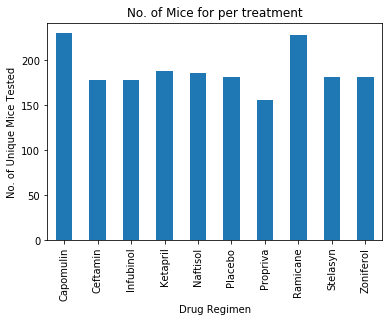

In [193]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#create a new dataframe including the drug regimen -> get count and then reset index3
bar_graph = clean_merge_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_graph.plot(kind='bar')
plt.title("No. of Mice for per treatment")
plt.ylabel("No. of Unique Mice Tested")
plt.show()



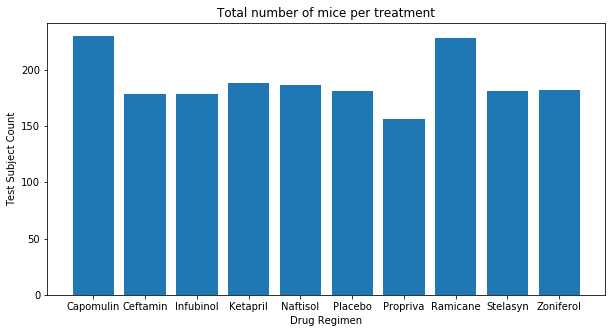

In [194]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#get drug names -> list
drug_names = summary_statistics.index.tolist()
drug_names

#get test_subject_count ->list
test_subject_count = (clean_merge_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
test_subject_count

#set x-axis = drug names <- use numpy.arange to help space the xaxis https://numpy.org/doc/stable/reference/generated/numpy.arange.html
xaxis = np.arange(len(test_subject_count))
xaxis = drug_names

xaxis
#create the graph
plt.figure(figsize=(len(xaxis),5))
plt.bar(xaxis, test_subject_count)

plt.title("Total number of mice per treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Test Subject Count")


plt.show()

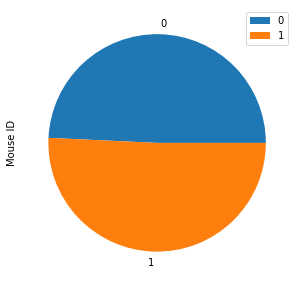

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data_df = pd.DataFrame(clean_merge_data.groupby(["Sex"]).count()).reset_index()
gender_data_df

#only need 2 values in the dataframe for the pie graph since we only have 2 genders
gender_data_df = gender_data_df[['Sex', 'Mouse ID']]
gender_data_df

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html
plot_pie = gender_data_df.plot.pie(y='Mouse ID', figsize=(5,5))
plt.show()



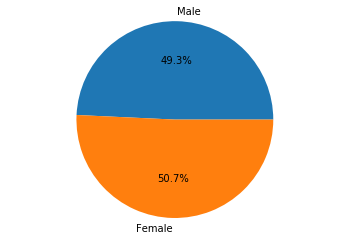

In [196]:

# Generate a pie plot showing the distribution of female versus male mice using pyplot
#https://datatofish.com/pie-chart-matplotlib/
my_labels = 'Male', 'Female'
plt.pie(gender_data_df["Mouse ID"], labels= my_labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [197]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_merge_data.loc[clean_merge_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_merge_data.loc[clean_merge_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_merge_data.loc[clean_merge_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_merge_data.loc[clean_merge_data["Drug Regimen"] == "Ceftamin", :]


# Start by getting the last (greatest) timepoint for each mouse
Capomulin_greatest = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_greatest = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_greatest = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_greatest = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']

In [198]:
#calculate quartiles and IQR for Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_greatest)
Capomulin_merge_data = pd.merge(Capomulin_volume, clean_merge_data, on=("Timepoint"),how="left")
Capomulin_merge_data.head()


tumors_for_Capomulin = Capomulin_merge_data["Tumor Volume (mm3)"]

quartiles = tumors_for_Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"Capomulin tumors Lower Quartile (25%): {lowerq}")
print(f"Capomulin tumors Upper Quartile (75%): {upperq}")
print(f"Capomulin tumors IQR: {iqr}")
print(f"Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print("===============================================")

Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_volume = pd.DataFrame(Ramicane_greatest)
Ramicane_merge_data = pd.merge(Ramicane_volume, clean_merge_data, on=("Timepoint"),how="left")
Ramicane_merge_data.head()


tumors_for_Ramicane = Ramicane_merge_data["Tumor Volume (mm3)"]

quartiles_Ramicane = tumors_for_Ramicane.quantile([.25,.5,.75])
lowerq_Ramicane = quartiles_Ramicane[0.25]
upperq_Ramicane = quartiles_Ramicane[0.75]
iqr_Ramicane = upperq_Ramicane-lowerq_Ramicane


print(f"Ramicane tumors Lower Quartile (25%): {lowerq_Ramicane}")
print(f"Ramicane tumors Upper Quartile (75%): {upperq_Ramicane}")
print(f"Ramicane tumors IQR: {iqr_Ramicane}")
print(f"Ramicane tumors: {quartiles_Ramicane[0.5]} ")

lower_bound_Ramicane = lowerq_Ramicane - (1.5*iqr_Ramicane)
upper_bound_Ramicane = upperq_Ramicane + (1.5*iqr_Ramicane)

print(f"Values below {lower_bound_Ramicane} could be outliers.")
print(f"Values above {upper_bound_Ramicane} could be outliers.")

print("===============================================")

Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_volume = pd.DataFrame(Infubinol_greatest)
Infubinol_merge_data = pd.merge(Infubinol_volume, clean_merge_data, on=("Timepoint"),how="left")
Infubinol_merge_data.head()


tumors_for_Infubinol = Infubinol_merge_data["Tumor Volume (mm3)"]

quartiles_Infubinol = tumors_for_Infubinol.quantile([.25,.5,.75])
lowerq_Infubinol = quartiles_Infubinol[0.25]
upperq_Infubinol = quartiles_Infubinol[0.75]
iqr_Infubinol = upperq_Infubinol-lowerq_Infubinol


print(f"Infubinol tumors Lower Quartile (25%): {lowerq_Infubinol}")
print(f"Infubinol tumors Upper Quartile (75%): {upperq_Infubinol}")
print(f"Infubinol tumors IQR: {iqr_Infubinol}")
print(f"Infubinol tumors: {quartiles_Infubinol[0.5]} ")

lower_bound_Infubinol = lowerq_Infubinol - (1.5*iqr_Infubinol)
upper_bound_Infubinol = upperq_Infubinol + (1.5*iqr_Infubinol)

print(f"Values below {lower_bound_Infubinol} could be outliers.")
print(f"Values above {upper_bound_Infubinol} could be outliers.")

print("===============================================")

Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_volume = pd.DataFrame(Ceftamin_greatest)
Ceftamin_merge_data = pd.merge(Ceftamin_volume, clean_merge_data, on=("Timepoint"),how="left")
Ceftamin_merge_data.head()


tumors_for_Ceftamin = Ceftamin_merge_data["Tumor Volume (mm3)"]

quartiles_Ceftamin = tumors_for_Ceftamin.quantile([.25,.5,.75])
lowerq_Ceftamin = quartiles_Ceftamin[0.25]
upperq_Ceftamin = quartiles_Ceftamin[0.75]
iqr_Ceftamin = upperq_Ceftamin-lowerq_Ceftamin


print(f"Ceftamin tumors Lower Quartile (25%): {lowerq_Ceftamin}")
print(f"Ceftamin tumors Upper Quartile (75%): {upperq_Ceftamin}")
print(f"Ceftamin tumors IQR: {iqr_Ceftamin}")
print(f"Ceftamin tumors: {quartiles_Ceftamin[0.5]} ")

lower_bound_Ceftamin = lowerq_Ceftamin - (1.5*iqr_Ceftamin)
upper_bound_Ceftamin = upperq_Ceftamin + (1.5*iqr_Ceftamin)

print(f"Values below {lower_bound_Ceftamin} could be outliers.")
print(f"Values above {upper_bound_Ceftamin} could be outliers.")


Capomulin tumors Lower Quartile (25%): 41.58152074
Capomulin tumors Upper Quartile (75%): 67.94212107
Capomulin tumors IQR: 26.360600329999997
Capomulin tumors: 61.43389223 
Values below 2.0406202450000066 could be outliers.
Values above 107.483021565 could be outliers.
Ramicane tumors Lower Quartile (25%): 41.58152074
Ramicane tumors Upper Quartile (75%): 67.68556862
Ramicane tumors IQR: 26.104047879999996
Ramicane tumors: 60.91876652 
Values below 2.425448920000008 could be outliers.
Values above 106.84164043999999 could be outliers.
Infubinol tumors Lower Quartile (25%): 45.656978499999994
Infubinol tumors Upper Quartile (75%): 61.19038663
Infubinol tumors IQR: 15.533408130000005
Infubinol tumors: 52.458270535 
Values below 22.356866304999986 could be outliers.
Values above 84.490498825 could be outliers.
Ceftamin tumors Lower Quartile (25%): 45.0
Ceftamin tumors Upper Quartile (75%): 62.67075904
Ceftamin tumors IQR: 17.67075904
Ceftamin tumors: 48.01878792 
Values below 18.49386144

/Users/arvindbhamidipati/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


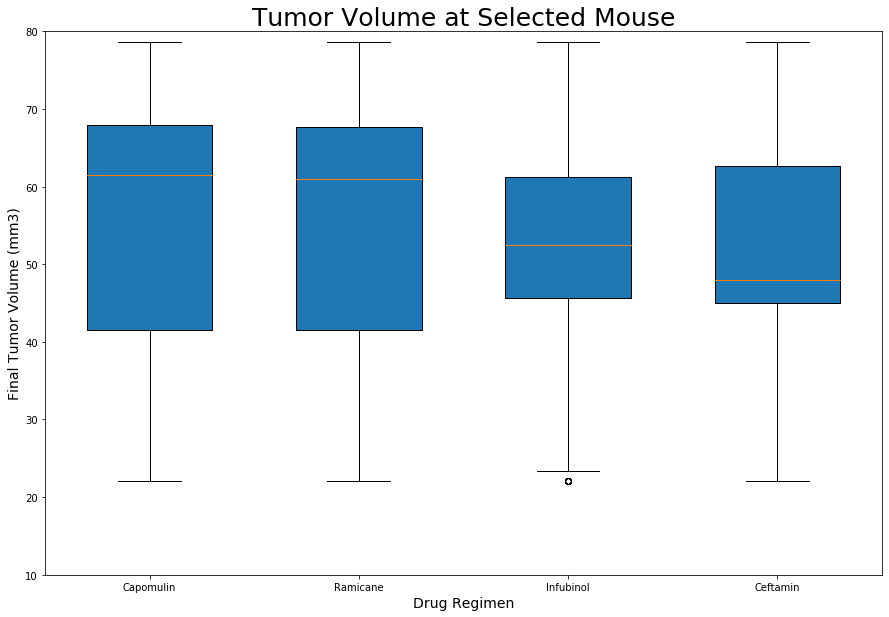

In [199]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plot_data = [tumors_for_Capomulin, tumors_for_Ramicane, tumors_for_Infubinol, tumors_for_Ceftamin]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

fig, axis = plt.subplots(figsize=(15, 10))
axis.set_title('Tumor Volume at Selected Mouse',fontsize =25)
axis.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
axis.set_xlabel('Drug Regimen',fontsize = 14)
axis.boxplot(plot_data, labels=Regimen, widths = 0.6, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

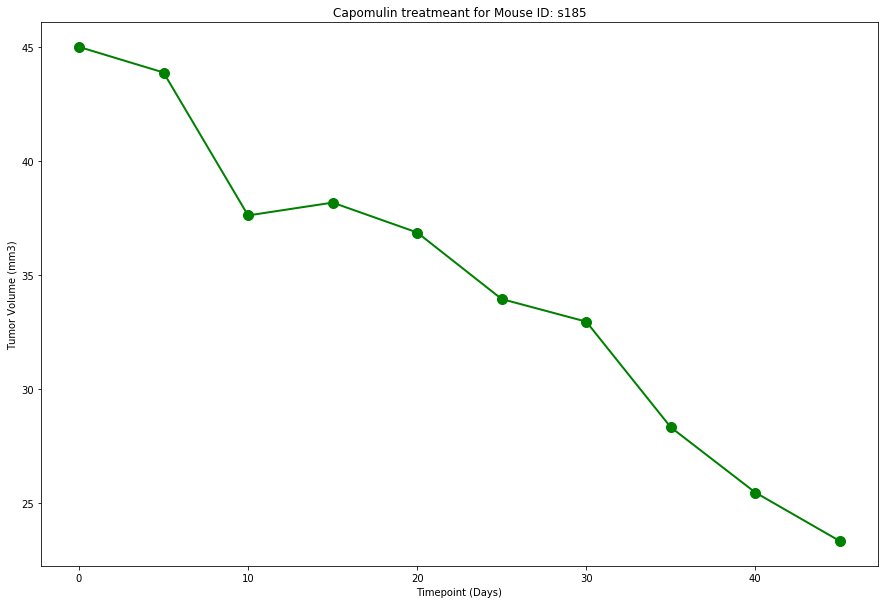

In [200]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "s185"]
Capomulin_line_df

xaxis = Capomulin_line_df["Timepoint"]
yaxis = Capomulin_line_df["Tumor Volume (mm3)"]

fig, axis = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant for Mouse ID: s185')
plt.plot(xaxis, yaxis,linewidth=2, markersize=10,marker="o",color="green")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()



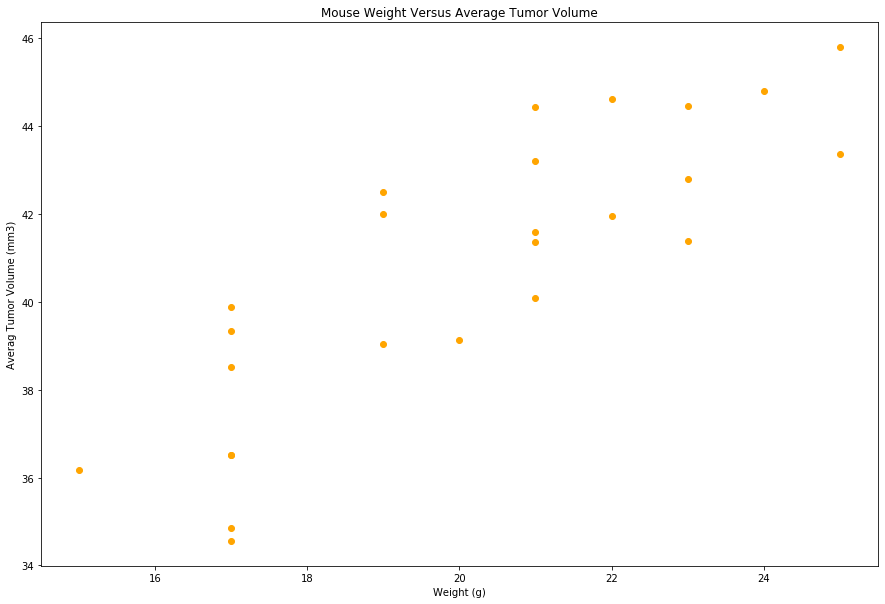

In [201]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

fig, ax = plt.subplots(figsize=(15, 10))
mean_volume =Capomulin_df.groupby(['Mouse ID']).mean()


plt.scatter(mean_volume['Weight (g)'],mean_volume['Tumor Volume (mm3)'], color="orange")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation value is 0.8419363424694719
The r-squared value is: 0.7088568047708717


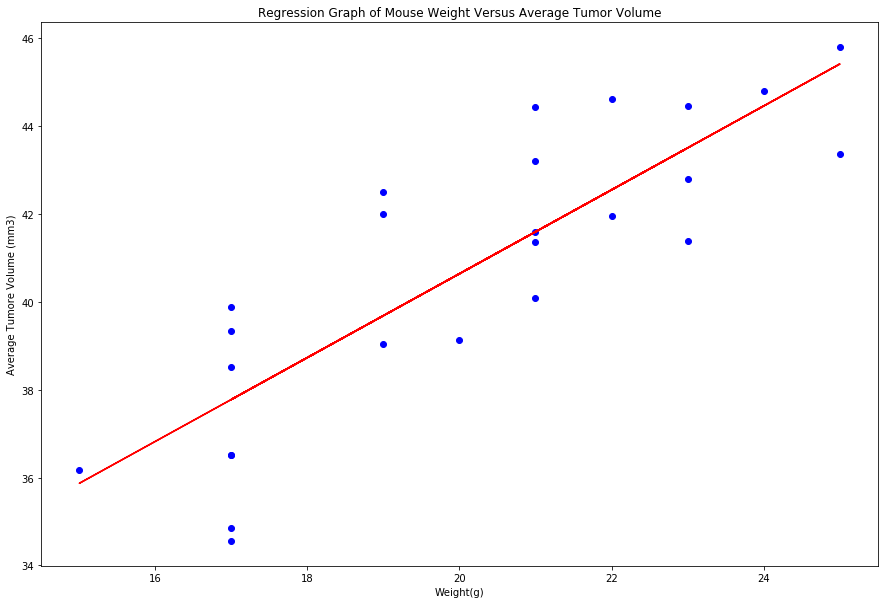

In [202]:
# Calculate the correlation coefficient and linear regression model
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
correlation=st.pearsonr(mean_volume["Weight (g)"],mean_volume["Tumor Volume (mm3)"])[0]
print(f"The correlation value is {correlation}")

xaxis = mean_volume['Weight (g)']
yaxis = mean_volume['Tumor Volume (mm3)']
# for mouse weight and average tumor volume for the Capomulin regimen

#https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept

fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(xaxis,yaxis, color="blue")
plt.plot(xaxis,regress_values,"r-")
plt.title('Regression Graph of Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

print(f"The r-squared value is: {rvalue**2}")
plt.show()